In [1]:
LLM = 'OPT'
from functions import * 

modelname = f'facebook/opt-1.3b'
model,tokenizer = get_model(LLM,modelname)
embedding_matrix = model.base_model.decoder.embed_tokens.weight.detach().numpy()
embedding_dim = embedding_matrix.shape[1]
print(f'{embedding_matrix.shape=}')

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


embedding_matrix.shape=(50272, 2048)


In [2]:
W = np.tensordot(embedding_matrix,embedding_matrix,axes=([0],[0]))
W.shape

(2048, 2048)

In [3]:
eigenvalues,eigenvectors = np.linalg.eigh(W)

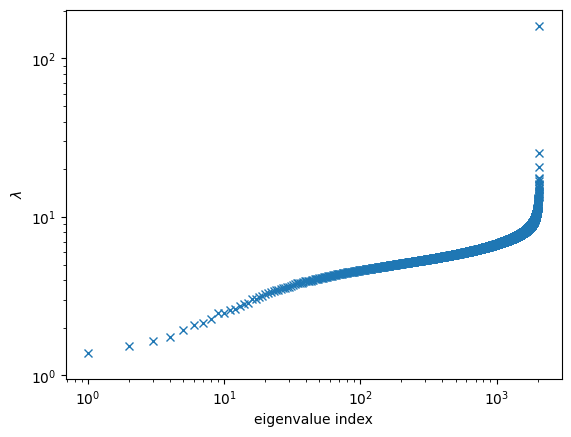

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
ax.plot(np.sqrt(eigenvalues),'x')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(f'eigenvalue index')
ax.set_ylabel(r'$\lambda$')
plt.show()

t=5:IPR=0.1509700685224344


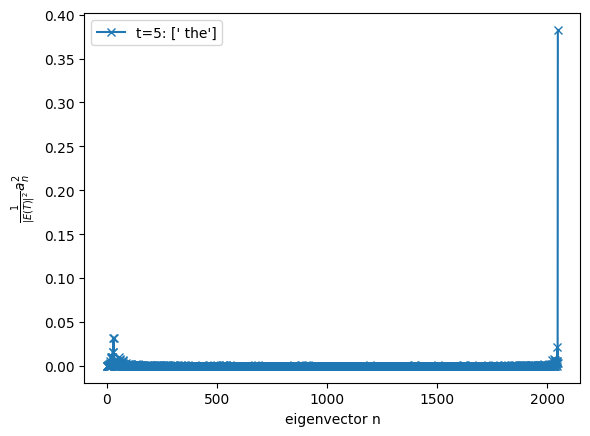

In [6]:
fig,ax = plt.subplots(1)
t_list = [5]
# t_list = range(1,10+1)
# t_list = np.arange(10,100+1,10)
# t_list = np.arange(1000,1000+10,1)
# t_list = np.array([10,100,1000,10000,20000])
cut = 4096+1 
start = 0 # embedding_dim - 10
for t in t_list:
  overlaps = np.zeros(shape=(embedding_dim))
  for n in range(embedding_dim):
    overlaps[n] = np.dot(embedding_matrix[t],eigenvectors[:,n])
  weights = overlaps**2 / np.dot(embedding_matrix[t],embedding_matrix[t])
  IPR = np.sum(weights**2)
  print(f't={t}:{IPR=}')
  weights = weights[start:cut+1]
  # weights = overlaps / np.sqrt(np.dot(embedding_matrix[t],embedding_matrix[t]))
  lbl = (f't={t}: {tokenizer.batch_decode([t])}')
  ax.set_ylabel(r'$\frac{1}{|E(T)|^2} a_n^2$')
  ax.set_xlabel(f'eigenvector n')
  plt.plot(range(start+1,start + len(weights)+1),
           weights,
           'x-',
           label=lbl)
plt.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()

### IPR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


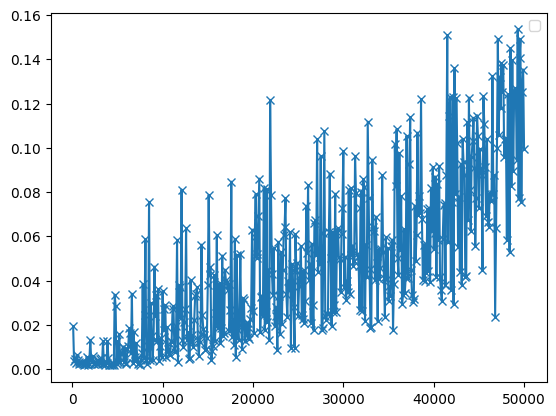

In [32]:
fig,ax = plt.subplots(1)
# t_list = [0,10]
# t_list = range(1,10+1)
# t_list = np.arange(10,100+1,10)
t_list = np.arange(100,50000+100,100)
# t_list = np.array([10,100,1000,10000,20000])
IPRs = np.empty(shape=(t_list.shape))
for t_id,t in enumerate(t_list):
  overlaps = np.zeros(shape=(embedding_dim))
  for n in range(embedding_dim):
    overlaps[n] = np.dot(embedding_matrix[t],eigenvectors[:,n])
  weights = overlaps**2 / np.dot(embedding_matrix[t],embedding_matrix[t])
  IPRs[t_id] = np.sum(weights**2)
  # weights = overlaps / np.sqrt(np.dot(embedding_matrix[t],embedding_matrix[t]))
# lbl = (f't={t}: {tokenizer.batch_decode([t])}')
# ax.set_ylabel(r'$\frac{1}{|E(T)|^2} a_n^2$')
# ax.set_xlabel(f'eigenvector n')
plt.plot(t_list,
        IPRs,
        'x-',
        # label=lbl,
        )
plt.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()

### Cosine similarity with the most relevant eigenvector

t=0: ['<s>'] -  similarities[t_id]=-0.7586145401000977
t=1: ['<pad>'] -  similarities[t_id]=-0.7791857719421387
t=2: ['</s>'] -  similarities[t_id]=0.2565174102783203
t=3: ['<unk>'] -  similarities[t_id]=-0.7582046985626221
t=4: ['.'] -  similarities[t_id]=0.5924809575080872
t=5: [' the'] -  similarities[t_id]=0.6185330748558044
t=6: [','] -  similarities[t_id]=0.6991987824440002
t=7: [' to'] -  similarities[t_id]=0.5476440191268921
t=8: [' and'] -  similarities[t_id]=0.6513149738311768
t=9: [' of'] -  similarities[t_id]=0.4637467861175537
t=10: [' a'] -  similarities[t_id]=0.6034809947013855
t=11: [' in'] -  similarities[t_id]=0.6447515487670898
t=12: ['-'] -  similarities[t_id]=0.5074499249458313
t=13: [' for'] -  similarities[t_id]=0.5260583162307739
t=14: [' that'] -  similarities[t_id]=0.4591328203678131
t=15: [' on'] -  similarities[t_id]=0.5326106548309326
t=16: [' is'] -  similarities[t_id]=0.49120745062828064
t=17: ['�'] -  similarities[t_id]=0.30508410930633545
t=18: ["'s"] -

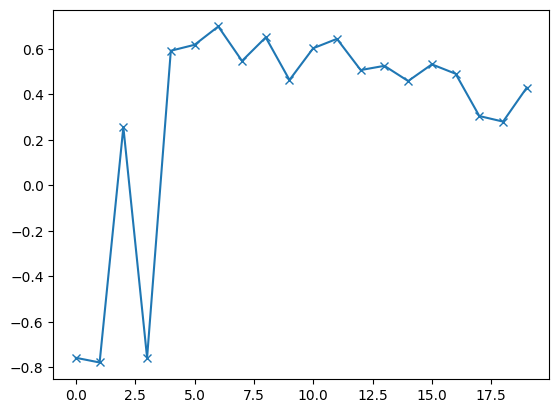

In [12]:
eig_index = -1
token_list = range(0,20)
similarities = np.zeros(shape=(len(token_list)))
for t_id,t in enumerate(token_list):
  similarities[t_id] = np.dot(embedding_matrix[t],eigenvectors[:,eig_index]) / np.linalg.norm(embedding_matrix[t])
  print(f'{t=}: {tokenizer.batch_decode([t])} -  {similarities[t_id]=}')

# plt.plot(token_list,np.abs(similarities),'x-')
# plt.yscale('log')

plt.plot(token_list,similarities,'x-')
# plt.xscale('log')
plt.show()

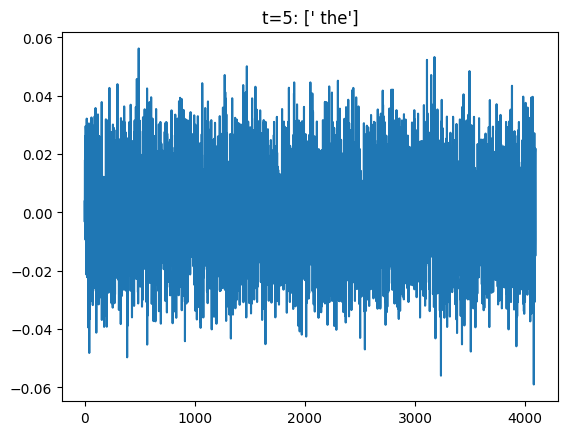

In [24]:
t = 5
plt.plot(embedding_matrix[t])
plt.title(f'{t=}: {tokenizer.batch_decode([t])}')
plt.show()

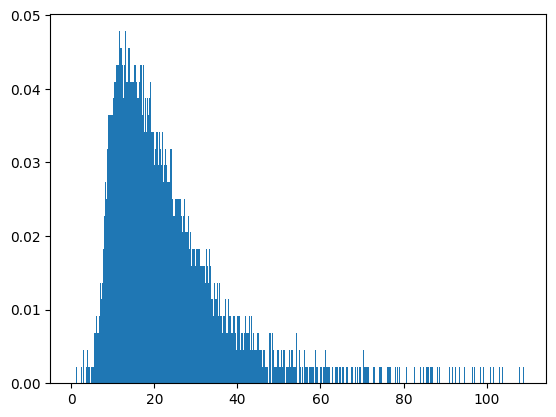

In [36]:
def MP():
  return

plt.hist(eigenvalues[:-50],bins=1000,density=True);
# plt.xscale('log')
# plt.yscale('log')
plt.show()